In [2]:
import pandas as pd
import requests
import os

In [3]:
api_url = "https://www.datos.gov.co/resource/nudc-7mev.json?$limit=50000"
print(f"📥 Extrayendo datos desde: {api_url}")

try:
    response = requests.get(api_url)
    response.raise_for_status()  # Lanza un error si la petición falla (ej: 404)
    data = response.json()
    df_raw = pd.DataFrame(data)
    print(f"✅ ¡Extracción exitosa! Se cargaron {len(df_raw)} filas.")
    display(df_raw.head())

except requests.exceptions.RequestException as e:
    print(f"❌ Error al extraer los datos: {e}")
    df_raw = pd.DataFrame() # Creamos un dataframe vacío para evitar errores posteriores

except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")
    df_raw = pd.DataFrame()

📥 Extrayendo datos desde: https://www.datos.gov.co/resource/nudc-7mev.json?$limit=50000
✅ ¡Extracción exitosa! Se cargaron 14585 filas.


,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,...,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
1,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,...,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
2,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,32.52,...,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
3,2023,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),10986,59.57,59.57,...,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN
4,2023,97161,Caruru,97,Vaupés,3831,Vaupés (ETC),1228,51.3,51.3,...,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN


## Aprendiendo Pandas

In [4]:
df_raw.info() ## ver información general de la base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   a_o                          14585 non-null  object
 1   c_digo_municipio             14585 non-null  object
 2   municipio                    14585 non-null  object
 3   c_digo_departamento          14585 non-null  object
 4   departamento                 14585 non-null  object
 5   c_digo_etc                   14585 non-null  object
 6   etc                          14585 non-null  object
 7   poblaci_n_5_16               14579 non-null  object
 8   tasa_matriculaci_n_5_16      14470 non-null  object
 9   cobertura_neta               14474 non-null  object
 10  cobertura_neta_transici_n    14533 non-null  object
 11  cobertura_neta_primaria      14494 non-null  object
 12  cobertura_neta_secundaria    14491 non-null  object
 13  cobertura_neta_media         14

Generemos una "muestra" de conjunto de datos
1. Tomando los primeros registros del conjunto de datos.

In [5]:
df_raw.head(15) ## metodo

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,...,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
1,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,...,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
2,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,32.52,...,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
3,2023,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),10986,59.57,59.57,...,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN
4,2023,97161,Caruru,97,Vaupés,3831,Vaupés (ETC),1228,51.3,51.3,...,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN
5,2023,97511,Pacoa,97,Vaupés,3831,Vaupés (ETC),1678,54.29,54.29,...,0,0,0,23.21,25.86,30.3,14.25,6.59,NaN,NaN
6,2023,97666,Taraira,97,Vaupés,3831,Vaupés (ETC),814,22.6,22.6,...,0,0,0,21.58,13.33,22.29,0,0,NaN,NaN
7,2023,97777,Papunaua,97,Vaupés,3831,Vaupés (ETC),209,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
8,2023,97889,Yavaraté,97,Vaupés,3831,Vaupés (ETC),561,47.95,47.95,...,0,0,0,12.33,3.13,19.5,3.95,4,NaN,NaN
9,2023,99001,Puerto Carreño,99,Vichada,3832,Vichada (ETC),4641,144.52,144.52,...,12.96,18.84,8.81,11.18,0.82,13.25,10.45,6.39,NaN,NaN


2. Ahora, usamos los índices para mostrar una fracción del conjunto de datos. 

In [6]:
df_raw.iloc[20:30] # (ver de 20 al 30) Pensemos en estos indices como un intervalo semiabierto [20,30)

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
20,2023,94001,Inírida,94,Guainía,3829,Guainía (ETC),9673,77.42,77.33,...,13.35,15.6,7.33,16.19,8.47,18.36,17.25,6.11,NaN,NaN
21,2023,91798,Tarapacá,91,Amazonas,3828,Amazonas (ETC),1327,50.04,50.04,...,1.26,24.2,63.16,26.09,1.28,28.87,29.3,31.58,NaN,NaN
22,2023,91669,Puerto Santander,91,Amazonas,3828,Amazonas (ETC),618,63.75,63.75,...,3.09,7.87,0,16.67,1.85,19.69,16.85,16.67,NaN,NaN
23,2023,91540,Puerto Nariño,91,Amazonas,3828,Amazonas (ETC),3232,55.07,55.07,...,13.51,15.47,5.32,15.37,5.85,18.61,16.75,3.72,NaN,NaN
24,2023,91536,Puerto Arica,91,Amazonas,3828,Amazonas (ETC),274,83.94,83.94,...,0.67,0,0,11.49,0,12.75,10.45,17.39,NaN,NaN
25,2023,91530,Puerto Alegría,91,Amazonas,3828,Amazonas (ETC),211,65.4,65.4,...,9.38,6.25,0,18.62,29.41,19.79,9.38,0,NaN,NaN
26,2023,91460,Miriti - Paraná,91,Amazonas,3828,Amazonas (ETC),571,49.39,49.39,...,0,0,0,12.5,17.65,11.05,18,2.63,NaN,NaN
27,2023,91430,La Victoria,91,Amazonas,3828,Amazonas (ETC),169,14.2,14.2,...,0,0,0,16.67,20,15.79,0,0,NaN,NaN
28,2023,91407,La Pedrera,91,Amazonas,3828,Amazonas (ETC),1203,67.17,67.17,...,0.6,5.73,4.62,12.97,2.63,20.24,4.85,3.08,NaN,NaN
29,2023,91405,La Chorrera,91,Amazonas,3828,Amazonas (ETC),1197,50.04,50.04,...,11.62,8.64,14,26.42,5.56,24.77,37.27,12,NaN,NaN


In [7]:
df_raw.iloc[20:30] ## Acá si tuvo encuenta el 30, intervalo cerrado [20,30]

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
20,2023,94001,Inírida,94,Guainía,3829,Guainía (ETC),9673,77.42,77.33,...,13.35,15.6,7.33,16.19,8.47,18.36,17.25,6.11,NaN,NaN
21,2023,91798,Tarapacá,91,Amazonas,3828,Amazonas (ETC),1327,50.04,50.04,...,1.26,24.2,63.16,26.09,1.28,28.87,29.3,31.58,NaN,NaN
22,2023,91669,Puerto Santander,91,Amazonas,3828,Amazonas (ETC),618,63.75,63.75,...,3.09,7.87,0,16.67,1.85,19.69,16.85,16.67,NaN,NaN
23,2023,91540,Puerto Nariño,91,Amazonas,3828,Amazonas (ETC),3232,55.07,55.07,...,13.51,15.47,5.32,15.37,5.85,18.61,16.75,3.72,NaN,NaN
24,2023,91536,Puerto Arica,91,Amazonas,3828,Amazonas (ETC),274,83.94,83.94,...,0.67,0,0,11.49,0,12.75,10.45,17.39,NaN,NaN
25,2023,91530,Puerto Alegría,91,Amazonas,3828,Amazonas (ETC),211,65.4,65.4,...,9.38,6.25,0,18.62,29.41,19.79,9.38,0,NaN,NaN
26,2023,91460,Miriti - Paraná,91,Amazonas,3828,Amazonas (ETC),571,49.39,49.39,...,0,0,0,12.5,17.65,11.05,18,2.63,NaN,NaN
27,2023,91430,La Victoria,91,Amazonas,3828,Amazonas (ETC),169,14.2,14.2,...,0,0,0,16.67,20,15.79,0,0,NaN,NaN
28,2023,91407,La Pedrera,91,Amazonas,3828,Amazonas (ETC),1203,67.17,67.17,...,0.6,5.73,4.62,12.97,2.63,20.24,4.85,3.08,NaN,NaN
29,2023,91405,La Chorrera,91,Amazonas,3828,Amazonas (ETC),1197,50.04,50.04,...,11.62,8.64,14,26.42,5.56,24.77,37.27,12,NaN,NaN


3. Muestra aleatoria

In [8]:
df_raw.sample(frac = 0.01, random_state=123456)

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
10516,2014,50330,Mesetas,50,Meta,3796,Meta (ETC),2904,76.41,89.01,...,0,0,0,0,0,0,0,0,25.59,1.75
2152,2022,5628,Sabanalarga,5,Antioquia,3758,Antioquia (ETC),2046,79.33,79.33,...,0.73,0.87,0,8.32,0,12.39,6.09,1.38,NaN,NaN
9454,2015,41660,Saladoblanco,41,Huila,3790,Huila (ETC),3108,86.87,86.87,...,5.56,0.47,0.45,2.68,1.95,3.96,1.29,0.45,33.45,12.5
10130,2014,97889,Yavaraté,97,Vaupés,3831,Vaupés (ETC),386,75.39,87.65,...,0,0,0,3.61,0,4.9,2.53,0,9.76,16.67
11152,2014,5411,Liborina,5,Antioquia,3758,Antioquia (ETC),1985,105.29,89.66,...,0,0,0,2.87,2.56,2.34,3.62,3.52,27.09,73.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,2019,50251,El Castillo,50,Meta,3796,Meta (ETC),1766,95.13,95.13,...,4.17,3.89,1.6,1.44,0,1.19,2.54,0,NaN,NaN
11711,2013,41503,Oporapa,41,Huila,3790,Huila (ETC),3997,68.83,68.8,...,4.47,9.14,8.14,1.26,0,2.09,0.58,0,NaN,11.11
9773,2015,15897,Zetaquira,15,Boyacá,3769,Boyacá (ETC),981,97.96,97.96,...,0,4.52,3.64,0.79,0,1.48,0.53,0,27.27,0
3428,2020,81065,Arauquita,81,Arauca,3824,Arauca (ETC),13580,68.03,68.03,...,7.96,15.51,7.36,6.42,1.93,5.15,10.88,2.03,NaN,NaN


In [9]:
df_raw.sample(n = 10, random_state=123456)

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
10516,2014,50330,Mesetas,50,Meta,3796,Meta (ETC),2904,76.41,89.01,...,0,0,0,0,0,0,0,0,25.59,1.75
2152,2022,5628,Sabanalarga,5,Antioquia,3758,Antioquia (ETC),2046,79.33,79.33,...,0.73,0.87,0,8.32,0,12.39,6.09,1.38,NaN,NaN
9454,2015,41660,Saladoblanco,41,Huila,3790,Huila (ETC),3108,86.87,86.87,...,5.56,0.47,0.45,2.68,1.95,3.96,1.29,0.45,33.45,12.5
10130,2014,97889,Yavaraté,97,Vaupés,3831,Vaupés (ETC),386,75.39,87.65,...,0,0,0,3.61,0,4.9,2.53,0,9.76,16.67
11152,2014,5411,Liborina,5,Antioquia,3758,Antioquia (ETC),1985,105.29,89.66,...,0,0,0,2.87,2.56,2.34,3.62,3.52,27.09,73.53
2210,2022,5134,Campamento,5,Antioquia,3758,Antioquia (ETC),2223,72.15,72.15,...,10.41,6.99,1.06,9.12,0,13.49,6.99,0.53,NaN,NaN
6968,2017,68368,Jesús María,68,Santander,3808,Santander (ETC),657,87.2,87.21,...,4.76,9.42,3.48,0,0,0,0,0,25.333,8.33
8852,2016,73675,San Antonio,73,Tolima,3815,Tolima (ETC),3510,90.9,90.85,...,6.59,8.57,5.08,0.18,0,0.12,0.18,0.68,24.985,56.67
13385,2012,5475,Murindó,5,Antioquia,3758,Antioquia (ETC),1023,95.6,95.6,...,0,0,0,0,0,0,0,0,30.33,5
2067,2022,13458,Montecristo,13,Bolívar,3767,Bolívar (ETC),4308,75.35,75.35,...,10.87,12.12,1.79,13.41,3.79,16.19,13.2,3.57,NaN,NaN


In [10]:
df_raw.tail(20) ## Ver la cola

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
14565,2011,5107,Briceño,5,Antioquia,3758,Antioquia (ETC),2256,94.1,94.1,...,0.9,0,0,0.91,0,1.28,0.67,0,16.28,83.33
14566,2011,5101,Ciudad Bolívar,5,Antioquia,3758,Antioquia (ETC),6651,88.24,88.2,...,0.03,0,1.63,4.13,0,5.24,3.54,2.77,20.75,97.06
14567,2011,5093,Betulia,5,Antioquia,3758,Antioquia (ETC),4260,95.45,95.5,...,11.11,13.81,9.76,0.08,0,0.12,0,0,26.89,87.8
14568,2011,5091,Betania,5,Antioquia,3758,Antioquia (ETC),2345,89.85,89.9,...,0,0,0,0.48,0,0.72,0.17,0,30.56,96.3
14569,2011,5088,Bello,5,Antioquia,3760,Bello,91582,82.53,82.4,...,0.12,0.11,1.35,3.12,0.41,2.39,5.03,1.63,28.52,87.5
14570,2011,5086,Belmira,5,Antioquia,3758,Antioquia (ETC),1700,97.76,97.8,...,1.92,0,0.58,NaN,0.66,NaN,NaN,5.85,26.95,100
14571,2011,5079,Barbosa,5,Antioquia,3758,Antioquia (ETC),10933,82.05,82.1,...,7.55,12.47,13.01,1.02,0,0.54,2.07,0.57,29.49,84
14572,2011,5059,Armenia,5,Antioquia,3758,Antioquia (ETC),1097,87.97,88,...,7.11,2.65,14.74,4.21,0,4.3,6.18,0,17.79,100
14573,2011,5055,Argelia,5,Antioquia,3758,Antioquia (ETC),2460,88.58,88.6,...,0,0,0.53,NaN,0,NaN,2.3,1.27,31.07,82.98
14574,2011,5051,Arboletes,5,Antioquia,3758,Antioquia (ETC),10673,84.85,84.9,...,3.1,3.74,4.91,2.25,0.66,2.41,2.85,0.73,26.36,47.22


Vamos a crear una copia del conjunto de datos, para cambiar los índices. 

In [11]:
df_raw2 = df_raw.copy() ## importante para hacer cambios crear una copia

In [12]:
df_raw.shape ## atributo

(14585, 41)

In [13]:
df_raw2['new_index'] = range(1,df_raw.shape[0]+1) ### Cración de index

In [14]:
df_raw2.head(3)

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet,new_index
0,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,...,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN,1
1,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,...,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN,2
2,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,32.52,...,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN,3


In [15]:
df_raw2.set_index('new_index', inplace = True)

In [16]:
df_raw2.head(2)

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
new_index,,,,,,,,,,,,,,,,,,,,,
1,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,...,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
2,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,...,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN


In [17]:
df_raw2.reset_index() ## quitarlo como index

,new_index,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
0,1,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,...,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
1,2,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,...,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
2,3,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,...,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
3,4,2023,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),10986,59.57,...,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN
4,5,2023,97161,Caruru,97,Vaupés,3831,Vaupés (ETC),1228,51.3,...,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14580,14581,2011,5036,Angelópolis,5,Antioquia,3758,Antioquia (ETC),1707,78.85,...,3.61,9.5,7.32,0.71,0,0.7,1.08,0,19.57,100
14581,14582,2011,5034,Andes,5,Antioquia,3758,Antioquia (ETC),10244,84.45,...,0.58,0.04,2.69,5.41,0.73,5.53,6.9,4.11,24.43,93.44
14582,14583,2011,5031,Amalfi,5,Antioquia,3758,Antioquia (ETC),5552,97.71,...,0,0,0,NaN,0.83,NaN,9.93,4.47,20.01,53.45
14583,14584,2011,5030,Amagá,5,Antioquia,3758,Antioquia (ETC),6631,78.65,...,6.73,14.46,7.45,0.42,0,0.24,0.91,0,25.05,83.33


Para evaluar si existen registros repetidos, usamos el método `drop_duplicate`

In [18]:
df_raw.drop_duplicates().shape

(14585, 41)

## Coversión de Variables Según su Naturaleza

In [19]:
## si no la hay creela y si la hay transformela

df_raw['tasa_matriculaci_n_5_16'] = df_raw['tasa_matriculaci_n_5_16'].astype(float)

In [20]:
df_raw['tasa_matriculaci_n_5_16'].describe()

count    14470.000000
mean        84.971929
std         18.589112
min          0.000000
25%         74.850000
50%         85.330000
75%         95.380000
max        279.030000
Name: tasa_matriculaci_n_5_16, dtype: float64

Ahora, vamos a generar una estadística de resumen a nivel de departamentos

In [21]:
df_raw.groupby(['c_digo_departamento', 'departamento']) ['tasa_matriculaci_n_5_16'].mean().reset_index() ## aclarar dentro de una lista cuales son las variables agrupadoras

,c_digo_departamento,departamento,tasa_matriculaci_n_5_16
0,0,NACIONAL,0.922600
1,05,Antioquia,84.215040
2,08,Atlántico,83.640435
3,11,Bogotá D.C.,96.410000
4,11,"Bogotá, D.C.",86.860833
5,13,Bolívar,86.463798
6,15,Boyacá,82.983827
7,17,Caldas,82.187436
8,18,Caquetá,75.105529
9,19,Cauca,79.346987


Como `NACIONAL` no es depto, se quita

In [22]:
df_raw[df_raw['departamento'] != 'NACIONAL']

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,...,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
1,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,...,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
2,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,32.52,...,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
3,2023,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),10986,59.57,59.57,...,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN
4,2023,97161,Caruru,97,Vaupés,3831,Vaupés (ETC),1228,51.30,51.3,...,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14580,2011,5036,Angelópolis,5,Antioquia,3758,Antioquia (ETC),1707,78.85,78.9,...,3.61,9.5,7.32,0.71,0,0.7,1.08,0,19.57,100
14581,2011,5034,Andes,5,Antioquia,3758,Antioquia (ETC),10244,84.45,84.5,...,0.58,0.04,2.69,5.41,0.73,5.53,6.9,4.11,24.43,93.44
14582,2011,5031,Amalfi,5,Antioquia,3758,Antioquia (ETC),5552,97.71,97.7,...,0,0,0,NaN,0.83,NaN,9.93,4.47,20.01,53.45
14583,2011,5030,Amagá,5,Antioquia,3758,Antioquia (ETC),6631,78.65,78.7,...,6.73,14.46,7.45,0.42,0,0.24,0.91,0,25.05,83.33


In [23]:
df_raw.query("departamento != 'NACIONAL'")

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,...,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,05004,Abriaquí,05,Antioquia,3758,Antioquia (ETC),503,62.62,62.62,...,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN
1,2023,95025,El Retorno,95,Guaviare,3830,Guaviare (ETC),4438,53.27,53.27,...,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
2,2023,95200,Miraflores,95,Guaviare,3830,Guaviare (ETC),2014,32.52,32.52,...,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
3,2023,97001,Mitú,97,Vaupés,3831,Vaupés (ETC),10986,59.57,59.57,...,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN
4,2023,97161,Caruru,97,Vaupés,3831,Vaupés (ETC),1228,51.30,51.3,...,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14580,2011,5036,Angelópolis,5,Antioquia,3758,Antioquia (ETC),1707,78.85,78.9,...,3.61,9.5,7.32,0.71,0,0.7,1.08,0,19.57,100
14581,2011,5034,Andes,5,Antioquia,3758,Antioquia (ETC),10244,84.45,84.5,...,0.58,0.04,2.69,5.41,0.73,5.53,6.9,4.11,24.43,93.44
14582,2011,5031,Amalfi,5,Antioquia,3758,Antioquia (ETC),5552,97.71,97.7,...,0,0,0,NaN,0.83,NaN,9.93,4.47,20.01,53.45
14583,2011,5030,Amagá,5,Antioquia,3758,Antioquia (ETC),6631,78.65,78.7,...,6.73,14.46,7.45,0.42,0,0.24,0.91,0,25.05,83.33


In [24]:
resumen_matriculados_v0=(
    df_raw
    .query("departamento != 'NACIONAL' ")
    .groupby(['c_digo_departamento','departamento'])
    ['tasa_matriculaci_n_5_16']
    .mean()
    .reset_index()
)

In [25]:
resumen_matriculados_v0

,c_digo_departamento,departamento,tasa_matriculaci_n_5_16
0,05,Antioquia,84.215040
1,08,Atlántico,83.640435
2,11,Bogotá D.C.,96.410000
3,11,"Bogotá, D.C.",86.860833
4,13,Bolívar,86.463798
5,15,Boyacá,82.983827
6,17,Caldas,82.187436
7,18,Caquetá,75.105529
8,19,Cauca,79.346987
9,20,Cesar,96.113944


In [26]:
def ajuste_cod_depto(codigo):
    if len(codigo)==1:
        codigo = '0' + codigo
    return codigo

In [28]:
ajuste_cod_depto('8') ## le pone 08

'08'

Vamos a aplicar esta función a todo el conjunto de datos

In [29]:
df_raw['c_digo_departamento'] = df_raw['c_digo_departamento'].apply(ajuste_cod_depto)

In [30]:
tabla_deptos = (
    df_raw
    .query("departamento != 'NACIONAL'")
    [['c_digo_departamento', 'departamento']]
    .drop_duplicates()
    .groupby('c_digo_departamento')
    .sample(n=1, random_state=1)
    .reset_index()
)

In [31]:
tabla_deptos

,index,c_digo_departamento,departamento
0,0,05,Antioquia
1,975,08,Atlántico
2,974,11,"Bogotá, D.C."
3,928,13,Bolívar
4,805,15,Boyacá
5,778,17,Caldas
6,762,18,Caquetá
7,720,19,Cauca
8,695,20,Cesar
9,665,23,Córdoba


In [32]:
df_raw = (
    df_raw
    .query("departamento != 'NACIONAL'")
    .drop(columns='departamento')
    .merge(tabla_deptos, on='c_digo_departamento', how='left')
)
df_raw.head(4)

,a_o,c_digo_municipio,municipio,c_digo_departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,...,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet,index,departamento
0,2023,05004,Abriaquí,05,3758,Antioquia (ETC),503,62.62,62.62,44.19,...,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN,0,Antioquia
1,2023,95025,El Retorno,95,3830,Guaviare (ETC),4438,53.27,53.27,33.91,...,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN,1,Guaviare
2,2023,95200,Miraflores,95,3830,Guaviare (ETC),2014,32.52,32.52,17.58,...,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN,1,Guaviare
3,2023,97001,Mitú,97,3831,Vaupés (ETC),10986,59.57,59.57,42.76,...,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN,3,Vaupés


In [33]:
resumen_matriculados_v0=(
    df_raw
    .query("departamento != 'NACIONAL' ")
    .groupby(['c_digo_departamento','departamento'])
    ['tasa_matriculaci_n_5_16']
    .mean()
    .reset_index()
)
resumen_matriculados_v0

,c_digo_departamento,departamento,tasa_matriculaci_n_5_16
0,05,Antioquia,87.887206
1,08,Atlántico,89.455816
2,11,"Bogotá, D.C.",87.595385
3,13,Bolívar,86.463798
4,15,Boyacá,82.983827
5,17,Caldas,82.187436
6,18,Caquetá,75.105529
7,19,Cauca,79.346987
8,20,Cesar,96.113944
9,23,Córdoba,88.003057


In [34]:
def longitud_cod_mpio(codigo):
    return len(codigo)


set(
    df_raw
    .query("departamento != 'NACIONAL' ")
    .assign(len_codigo_mpio = lambda x: x['c_digo_municipio'].apply(longitud_cod_mpio)) 
    ['len_codigo_mpio']
    .astype(str)
)

{'4', '5'}

In [35]:
def ajuste_cod_mpio(codigo):
    if len(codigo)==4:
        codigo = '0' + codigo
    return codigo

In [36]:
df_raw['c_digo_municipio'] = df_raw['c_digo_municipio'].apply(ajuste_cod_mpio)

In [40]:
pd.set_option('display.max_columns', None) ## muestra todos los datos
df_raw

,a_o,c_digo_municipio,municipio,c_digo_departamento,c_digo_etc,etc,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_transici_n,deserci_n_primaria,deserci_n_secundaria,deserci_n_media,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet,index,departamento
0,2023,05004,Abriaquí,05,3758,Antioquia (ETC),503,62.62,62.62,44.19,63.33,51.53,40.23,66.8,58.14,72.86,66.87,56.32,1.19,0,1.31,0,4.08,92.26,0,96.73,83.49,93.88,6.55,0,1.96,16.51,2.04,9.52,0,10.46,13.76,2.04,NaN,NaN,0,Antioquia
1,2023,95025,El Retorno,95,3830,Guaviare (ETC),4438,53.27,53.27,33.91,48.89,44.9,21.3,62.98,54.2,65.19,69.6,48.54,5.56,6.95,4.99,6.11,5.26,87.67,0,87.9,84.5,92.98,6.78,0,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN,1,Guaviare
2,2023,95200,Miraflores,95,3830,Guaviare (ETC),2014,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.1,26.16,7.85,15,8.43,6.36,4.69,82.68,3.33,84.64,79.51,87.5,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN,1,Guaviare
3,2023,97001,Mitú,97,3831,Vaupés (ETC),10986,59.57,59.57,42.76,55.95,43.51,17.06,70.65,64.9,76.96,72.92,53.12,3.95,2.27,1.84,6.77,5.47,90.71,0.57,94.12,84.91,89.93,5.34,0.57,4.04,8.33,4.6,16.18,7.75,21.04,13.84,7.18,NaN,NaN,3,Vaupés
4,2023,97161,Caruru,97,3831,Vaupés (ETC),1228,51.30,51.3,76.32,52.29,33.71,11.94,55.54,92.11,65.21,51.12,27.36,8.36,4.29,3.05,15.72,14.55,82.4,0,89.63,69,78.18,9.24,0,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN,3,Vaupés
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14577,2011,05036,Angelópolis,05,3758,Antioquia (ETC),1707,78.85,78.9,56.2,82.4,59.9,26.4,82.8,77.4,105,80.4,40.1,8.14,6.6,6.1,13.17,2.44,86.27,0,90.29,77.32,90.24,5.59,0,3.61,9.5,7.32,0.71,0,0.7,1.08,0,19.57,100,0,Antioquia
14578,2011,05034,Andes,05,3758,Antioquia (ETC),10244,84.45,84.5,65.1,83.7,62,32.2,91.7,81.1,107.5,89.9,61.4,3.96,3.06,4.3,4.36,1.68,95.46,0,95.12,95.61,95.63,0.58,0,0.58,0.04,2.69,5.41,0.73,5.53,6.9,4.11,24.43,93.44,0,Antioquia
14579,2011,05031,Amalfi,05,3758,Antioquia (ETC),5552,97.71,97.7,61.7,107.2,65.1,27.3,108.4,77.9,146.8,97.3,53.9,8.75,5.83,8.59,9.49,9.74,91.25,0,91.41,90.51,90.26,0,0,0,0,0,NaN,0.83,NaN,9.93,4.47,20.01,53.45,0,Antioquia
14580,2011,05030,Amagá,05,3758,Antioquia (ETC),6631,78.65,78.7,55.3,76.3,70.7,38.9,87.7,74.3,89.8,96.3,73.2,4.16,2.39,3.23,6.12,3.21,86.86,0.24,90.04,79.42,89.34,8.99,0.24,6.73,14.46,7.45,0.42,0,0.24,0.91,0,25.05,83.33,0,Antioquia


In [ ]:
#df_raw = df_raw.drop(columns=['index']) ## Index no nos sirve, lo podemos eliminar

In [89]:
df_raw = df_raw.drop(columns=['c_digo_etc', 'etc'])

In [90]:
df_raw.dtypes

a_o                             object
c_digo_municipio                object
municipio                       object
c_digo_departamento             object
poblaci_n_5_16                 float64
tasa_matriculaci_n_5_16        float64
cobertura_neta                 float64
cobertura_neta_transici_n      float64
cobertura_neta_primaria        float64
cobertura_neta_secundaria      float64
cobertura_neta_media           float64
cobertura_bruta                float64
cobertura_bruta_transici_n     float64
cobertura_bruta_primaria       float64
cobertura_bruta_secundaria     float64
cobertura_bruta_media          float64
deserci_n                      float64
deserci_n_transici_n           float64
deserci_n_primaria             float64
deserci_n_secundaria           float64
deserci_n_media                float64
aprobaci_n                     float64
aprobaci_n_transici_n          float64
aprobaci_n_primaria            float64
aprobaci_n_secundaria          float64
aprobaci_n_media         

In [91]:
### arreglar formatos de texto

columnas_numericas = [
    'poblaci_n_5_16',
    'cobertura_neta', 'cobertura_neta_transici_n', 'cobertura_neta_primaria',
    'cobertura_neta_secundaria', 'cobertura_neta_media',
    'cobertura_bruta', 'cobertura_bruta_transici_n', 'cobertura_bruta_primaria',
    'cobertura_bruta_secundaria', 'cobertura_bruta_media',
    'deserci_n', 'deserci_n_transici_n', 'deserci_n_primaria', 'deserci_n_secundaria',
    'deserci_n_media', 'aprobaci_n', 'aprobaci_n_transici_n', 'aprobaci_n_primaria',
    'aprobaci_n_secundaria', 'aprobaci_n_media', 'reprobaci_n', 'reprobaci_n_transici_n',
    'reprobaci_n_primaria', 'reprobaci_n_secundaria', 'reprobaci_n_media',
    'repitencia', 'repitencia_transici_n', 'repitencia_primaria',
    'repitencia_secundaria', 'repitencia_media', 'tama_o_promedio_de_grupo',
    'sedes_conectadas_a_internet'
]

for col in columnas_numericas:
    df_raw[col] = (
        df_raw[col]
        .astype(str)
        .str.replace(',', '', regex=False)  # quitar separadores de miles
        .str.replace('%', '', regex=False)  # quitar simbolos de porcentaje si hay
        .replace('', None)                  # reemplazar vacíos por NaN
        .astype(float)
    )


In [93]:
## formato texto correcto

df_raw['c_digo_municipio'] = df_raw['c_digo_municipio'].astype(str).str.zfill(5)
df_raw['c_digo_departamento'] = df_raw['c_digo_departamento'].astype(str).str.zfill(2)

In [94]:
df_raw.dtypes

a_o                             object
c_digo_municipio                object
municipio                       object
c_digo_departamento             object
poblaci_n_5_16                 float64
tasa_matriculaci_n_5_16        float64
cobertura_neta                 float64
cobertura_neta_transici_n      float64
cobertura_neta_primaria        float64
cobertura_neta_secundaria      float64
cobertura_neta_media           float64
cobertura_bruta                float64
cobertura_bruta_transici_n     float64
cobertura_bruta_primaria       float64
cobertura_bruta_secundaria     float64
cobertura_bruta_media          float64
deserci_n                      float64
deserci_n_transici_n           float64
deserci_n_primaria             float64
deserci_n_secundaria           float64
deserci_n_media                float64
aprobaci_n                     float64
aprobaci_n_transici_n          float64
aprobaci_n_primaria            float64
aprobaci_n_secundaria          float64
aprobaci_n_media         

In [95]:
## departamento despues de codigo departamento

# lista de columnas
cols = df_raw.columns.tolist()

# reorganizar colocando 'departamento' después de 'c_digo_departamento'
cols.remove('departamento')
pos = cols.index('c_digo_departamento') + 1
cols.insert(pos, 'departamento')

# Aplicar nuevo orden
df_raw = df_raw[cols]
df_raw

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_transici_n,deserci_n_primaria,deserci_n_secundaria,deserci_n_media,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,tama_o_promedio_de_grupo,sedes_conectadas_a_internet
0,2023,05004,Abriaquí,05,Antioquia,503.0,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,0.00,1.31,0.00,4.08,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04,NaN,NaN
1,2023,95025,El Retorno,95,Guaviare,4438.0,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,6.95,4.99,6.11,5.26,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,NaN,NaN
2,2023,95200,Miraflores,95,Guaviare,2014.0,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,15.00,8.43,6.36,4.69,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,NaN,NaN
3,2023,97001,Mitú,97,Vaupés,10986.0,59.57,59.57,42.76,55.95,43.51,17.06,70.65,64.90,76.96,72.92,53.12,3.95,2.27,1.84,6.77,5.47,90.71,0.57,94.12,84.91,89.93,5.34,0.57,4.04,8.33,4.60,16.18,7.75,21.04,13.84,7.18,NaN,NaN
4,2023,97161,Caruru,97,Vaupés,1228.0,51.30,51.30,76.32,52.29,33.71,11.94,55.54,92.11,65.21,51.12,27.36,8.36,4.29,3.05,15.72,14.55,82.40,0.00,89.63,69.00,78.18,9.24,0.00,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14577,2011,05036,Angelópolis,05,Antioquia,1707.0,78.85,78.90,56.20,82.40,59.90,26.40,82.80,77.40,105.00,80.40,40.10,8.14,6.60,6.10,13.17,2.44,86.27,0.00,90.29,77.32,90.24,5.59,0.00,3.61,9.50,7.32,0.71,0.00,0.70,1.08,0.00,19.57,100.00
14578,2011,05034,Andes,05,Antioquia,10244.0,84.45,84.50,65.10,83.70,62.00,32.20,91.70,81.10,107.50,89.90,61.40,3.96,3.06,4.30,4.36,1.68,95.46,0.00,95.12,95.61,95.63,0.58,0.00,0.58,0.04,2.69,5.41,0.73,5.53,6.90,4.11,24.43,93.44
14579,2011,05031,Amalfi,05,Antioquia,5552.0,97.71,97.70,61.70,107.20,65.10,27.30,108.40,77.90,146.80,97.30,53.90,8.75,5.83,8.59,9.49,9.74,91.25,0.00,91.41,90.51,90.26,0.00,0.00,0.00,0.00,0.00,NaN,0.83,NaN,9.93,4.47,20.01,53.45
14580,2011,05030,Amagá,05,Antioquia,6631.0,78.65,78.70,55.30,76.30,70.70,38.90,87.70,74.30,89.80,96.30,73.20,4.16,2.39,3.23,6.12,3.21,86.86,0.24,90.04,79.42,89.34,8.99,0.24,6.73,14.46,7.45,0.42,0.00,0.24,0.91,0.00,25.05,83.33


### Faltantes, eliminar los que tienen muchos datos faltantes

In [97]:
df_raw.isnull().sum().sort_values(ascending=False)

tama_o_promedio_de_grupo       7010
sedes_conectadas_a_internet    6814
deserci_n_transici_n            903
deserci_n_media                 734
deserci_n_secundaria            270
deserci_n_primaria              242
repitencia_transici_n           159
repitencia_secundaria           152
repitencia_primaria             148
reprobaci_n_media               145
repitencia                      143
deserci_n                       142
repitencia_media                139
cobertura_bruta_media           127
tasa_matriculaci_n_5_16         115
cobertura_neta                  111
reprobaci_n_secundaria          106
aprobaci_n_media                101
cobertura_bruta_transici_n       97
reprobaci_n_primaria             97
cobertura_neta_secundaria        94
reprobaci_n_transici_n           93
aprobaci_n_transici_n            93
cobertura_neta_media             93
cobertura_neta_primaria          91
cobertura_bruta_secundaria       88
reprobaci_n                      86
cobertura_bruta_primaria    

In [98]:
# Eliminar columnas con demasiados nulos 
df_raw.drop(columns=['tama_o_promedio_de_grupo', 'sedes_conectadas_a_internet', 'deserci_n_transici_n', 'deserci_n_media'], inplace=True)
df_raw.head(3)

C:\Users\laura\AppData\Local\Temp\ipykernel_21180\248513772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw.drop(columns=['tama_o_promedio_de_grupo', 'sedes_conectadas_a_internet', 'deserci_n_transici_n', 'deserci_n_media'], inplace=True)


,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_primaria,deserci_n_secundaria,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media
0,2023,05004,Abriaquí,05,Antioquia,503.0,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,1.31,0.00,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
1,2023,95025,El Retorno,95,Guaviare,4438.0,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,4.99,6.11,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16
2,2023,95200,Miraflores,95,Guaviare,2014.0,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,8.43,6.36,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54


In [102]:
df_raw = df_raw.copy()

In [103]:
### imputar faltantes con mediana

imputacion_mediana = [
    'deserci_n_secundaria', 'deserci_n_primaria', 'repitencia_transici_n', 'repitencia_secundaria', 
    'repitencia_primaria', 'reprobaci_n_media', 'repitencia', 'deserci_n', 'repitencia_media', 
    'cobertura_bruta_media', 'tasa_matriculaci_n_5_16', 'cobertura_neta', 'reprobaci_n_secundaria', 
    'aprobaci_n_media', 'cobertura_bruta_transici_n', 'reprobaci_n_primaria', 'cobertura_neta_secundaria', 
    'cobertura_neta_media', 'reprobaci_n_transici_n', 'aprobaci_n_transici_n', 'cobertura_neta_primaria', 
    'cobertura_bruta_secundaria', 'reprobaci_n', 'cobertura_bruta_primaria', 'cobertura_bruta', 
    'aprobaci_n_secundaria', 'cobertura_neta_transici_n', 'aprobaci_n_primaria', 'aprobaci_n', 
    'poblaci_n_5_16'
]

for col in imputacion_mediana:
    df_raw[col] = df_raw[col].fillna(df_raw[col].median())

In [104]:
## Prueba
### Valores nulos
df_raw.isnull().sum().sort_values(ascending=False)

a_o                           0
c_digo_municipio              0
municipio                     0
c_digo_departamento           0
departamento                  0
poblaci_n_5_16                0
tasa_matriculaci_n_5_16       0
cobertura_neta                0
cobertura_neta_transici_n     0
cobertura_neta_primaria       0
cobertura_neta_secundaria     0
cobertura_neta_media          0
cobertura_bruta               0
cobertura_bruta_transici_n    0
cobertura_bruta_primaria      0
cobertura_bruta_secundaria    0
cobertura_bruta_media         0
deserci_n                     0
deserci_n_primaria            0
deserci_n_secundaria          0
aprobaci_n                    0
aprobaci_n_transici_n         0
aprobaci_n_primaria           0
aprobaci_n_secundaria         0
aprobaci_n_media              0
reprobaci_n                   0
reprobaci_n_transici_n        0
reprobaci_n_primaria          0
reprobaci_n_secundaria        0
reprobaci_n_media             0
repitencia                    0
repitenc

In [105]:
df_raw[imputacion_mediana].describe()

,deserci_n_secundaria,deserci_n_primaria,repitencia_transici_n,repitencia_secundaria,repitencia_primaria,reprobaci_n_media,repitencia,deserci_n,repitencia_media,cobertura_bruta_media,tasa_matriculaci_n_5_16,cobertura_neta,reprobaci_n_secundaria,aprobaci_n_media,cobertura_bruta_transici_n,reprobaci_n_primaria,cobertura_neta_secundaria,cobertura_neta_media,reprobaci_n_transici_n,aprobaci_n_transici_n,cobertura_neta_primaria,cobertura_bruta_secundaria,reprobaci_n,cobertura_bruta_primaria,cobertura_bruta,aprobaci_n_secundaria,cobertura_neta_transici_n,aprobaci_n_primaria,aprobaci_n,poblaci_n_5_16
count,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,14582.000000,1.458200e+04
mean,4.568885,2.749975,0.933135,4.310828,3.157061,4.121498,3.288975,3.487122,1.690343,75.865937,84.992045,85.577053,6.805669,92.167227,87.135333,3.881868,69.926184,40.758024,0.483803,0.483803,82.585241,101.135100,4.756870,105.093967,97.579165,88.379478,57.704857,93.233581,91.627448,8.302304e+03
std,3.074556,2.031311,2.404131,4.527894,3.627971,4.192027,3.355109,2.161911,2.274741,26.856202,18.478310,16.825936,6.131181,6.867764,25.453826,3.790051,18.746043,15.570022,1.648629,1.648629,17.111552,25.708737,3.987597,25.174776,21.208524,7.858355,16.150646,5.041247,5.162328,4.556071e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,2.380000,1.280000,0.000000,0.750000,0.600000,0.682500,0.730000,1.950000,0.000000,59.760000,74.950000,76.962500,0.762500,89.470000,71.560000,0.430000,60.500000,31.192500,0.000000,0.000000,73.310000,86.642500,0.950000,89.910000,85.730000,83.660000,47.590000,90.580000,88.450000,1.165000e+03
50%,4.040000,2.320000,0.000000,2.740000,1.880000,3.110000,2.160000,3.130000,0.870000,75.250000,85.330000,86.400000,6.160000,93.290000,85.220000,3.330000,70.900000,41.180000,0.000000,0.000000,82.840000,101.535000,4.520000,103.320000,97.490000,89.100000,57.900000,93.870000,92.020000,2.639000e+03
75%,6.150000,3.750000,0.920000,6.770000,4.550000,6.360000,5.047500,4.640000,2.530000,90.240000,95.307500,94.477500,10.790000,96.410000,100.000000,5.980000,80.500000,50.500000,0.210000,0.210000,91.867500,115.630000,7.397500,117.600000,109.190000,94.440000,68.000000,96.940000,95.580000,5.862750e+03
max,47.140000,18.310000,50.000000,55.070000,50.760000,67.860000,37.470000,27.900000,36.450000,489.620000,279.030000,264.540000,76.970000,100.000000,259.290000,51.970000,229.440000,170.260000,52.710000,52.710000,254.960000,301.710000,49.390000,326.400000,286.920000,100.000000,150.470000,100.000000,100.000000,1.479334e+06


- Las variables relacionadas con cobertura educativa y tasa de matrícula pueden superar el 100% debido a factores como extraedad (estudiantes fuera de la edad teórica para un nivel educativo) y flujos migratorios no capturados en las proyecciones de población. Esto es común en áreas con alta demanda social o movimientos poblacionales.

### Necesito crear la variable: `total matriculados`

In [106]:
df_raw['total_matriculados'] = df_raw['poblaci_n_5_16'] * df_raw['tasa_matriculaci_n_5_16']
df_raw.head(3)

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,poblaci_n_5_16,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_primaria,deserci_n_secundaria,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media,total_matriculados
0,2023,05004,Abriaquí,05,Antioquia,503.0,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,1.31,0.00,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04,31497.86
1,2023,95025,El Retorno,95,Guaviare,4438.0,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,4.99,6.11,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,236412.26
2,2023,95200,Miraflores,95,Guaviare,2014.0,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,8.43,6.36,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,65495.28


In [107]:
## ordenar tablas 

columnas_orden = list(df_raw.columns)
columnas_orden.insert(6, columnas_orden.pop(columnas_orden.index('total_matriculados')))

df_raw = df_raw[columnas_orden]
df_raw.head(3)

,a_o,c_digo_municipio,municipio,c_digo_departamento,departamento,poblaci_n_5_16,total_matriculados,tasa_matriculaci_n_5_16,cobertura_neta,cobertura_neta_transici_n,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta,cobertura_bruta_transici_n,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,deserci_n,deserci_n_primaria,deserci_n_secundaria,aprobaci_n,aprobaci_n_transici_n,aprobaci_n_primaria,aprobaci_n_secundaria,aprobaci_n_media,reprobaci_n,reprobaci_n_transici_n,reprobaci_n_primaria,reprobaci_n_secundaria,reprobaci_n_media,repitencia,repitencia_transici_n,repitencia_primaria,repitencia_secundaria,repitencia_media
0,2023,05004,Abriaquí,05,Antioquia,503.0,31497.86,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,1.31,0.00,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
1,2023,95025,El Retorno,95,Guaviare,4438.0,236412.26,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,4.99,6.11,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16
2,2023,95200,Miraflores,95,Guaviare,2014.0,65495.28,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,8.43,6.36,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54


In [108]:
nuevos_nombres = {
    'a_o': 'anio',
    'c_digo_municipio': 'codigo_municipio',
    'municipio': 'nombre_municipio',
    'c_digo_departamento': 'codigo_departamento',
    'departamento': 'nombre_departamento',
    'poblaci_n_5_16': 'poblacion_5_16',
    'total_matriculados': 'total_matriculados',
    'tasa_matriculaci_n_5_16': 'tasa_matriculacion_5_16',
    'cobertura_neta': 'cobertura_neta_total',
    'cobertura_neta_transici_n': 'cobertura_neta_transicion',
    'cobertura_neta_primaria': 'cobertura_neta_primaria',
    'cobertura_neta_secundaria': 'cobertura_neta_secundaria',
    'cobertura_neta_media': 'cobertura_neta_media',
    'cobertura_bruta': 'cobertura_bruta_total',
    'cobertura_bruta_transici_n': 'cobertura_bruta_transicion',
    'cobertura_bruta_primaria': 'cobertura_bruta_primaria',
    'cobertura_bruta_secundaria': 'cobertura_bruta_secundaria',
    'cobertura_bruta_media': 'cobertura_bruta_media',
    'deserci_n': 'tasa_desercion_total',
    'deserci_n_primaria': 'tasa_desercion_primaria',
    'deserci_n_secundaria': 'tasa_desercion_secundaria',
    'aprobaci_n': 'tasa_aprobacion_total',
    'aprobaci_n_transici_n': 'tasa_aprobacion_transicion',
    'aprobaci_n_primaria': 'tasa_aprobacion_primaria',
    'aprobaci_n_secundaria': 'tasa_aprobacion_secundaria',
    'aprobaci_n_media': 'tasa_aprobacion_media',
    'reprobaci_n': 'tasa_reprobacion_total',
    'reprobaci_n_transici_n': 'tasa_reprobacion_transicion',
    'reprobaci_n_primaria': 'tasa_reprobacion_primaria',
    'reprobaci_n_secundaria': 'tasa_reprobacion_secundaria',
    'reprobaci_n_media': 'tasa_reprobacion_media',
    'repitencia': 'tasa_repitencia_total',
    'repitencia_transici_n': 'tasa_repitencia_transicion',
    'repitencia_primaria': 'tasa_repitencia_primaria',
    'repitencia_secundaria': 'tasa_repitencia_secundaria',
    'repitencia_media': 'tasa_repitencia_media'
}

df_raw.rename(columns=nuevos_nombres, inplace=True) ## aca renombra
df_raw.head(2)

,anio,codigo_municipio,nombre_municipio,codigo_departamento,nombre_departamento,poblacion_5_16,total_matriculados,tasa_matriculacion_5_16,cobertura_neta_total,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta_total,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,tasa_desercion_total,tasa_desercion_primaria,tasa_desercion_secundaria,tasa_aprobacion_total,tasa_aprobacion_transicion,tasa_aprobacion_primaria,tasa_aprobacion_secundaria,tasa_aprobacion_media,tasa_reprobacion_total,tasa_reprobacion_transicion,tasa_reprobacion_primaria,tasa_reprobacion_secundaria,tasa_reprobacion_media,tasa_repitencia_total,tasa_repitencia_transicion,tasa_repitencia_primaria,tasa_repitencia_secundaria,tasa_repitencia_media
0,2023,05004,Abriaquí,05,Antioquia,503.0,31497.86,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,1.31,0.00,92.26,0.0,96.73,83.49,93.88,6.55,0.0,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
1,2023,95025,El Retorno,95,Guaviare,4438.0,236412.26,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,4.99,6.11,87.67,0.0,87.90,84.50,92.98,6.78,0.0,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16


In [110]:
df_raw.dtypes

anio                            object
codigo_municipio                object
nombre_municipio                object
codigo_departamento             object
nombre_departamento             object
poblacion_5_16                 float64
total_matriculados             float64
tasa_matriculacion_5_16        float64
cobertura_neta_total           float64
cobertura_neta_transicion      float64
cobertura_neta_primaria        float64
cobertura_neta_secundaria      float64
cobertura_neta_media           float64
cobertura_bruta_total          float64
cobertura_bruta_transicion     float64
cobertura_bruta_primaria       float64
cobertura_bruta_secundaria     float64
cobertura_bruta_media          float64
tasa_desercion_total           float64
tasa_desercion_primaria        float64
tasa_desercion_secundaria      float64
tasa_aprobacion_total          float64
tasa_aprobacion_transicion     float64
tasa_aprobacion_primaria       float64
tasa_aprobacion_secundaria     float64
tasa_aprobacion_media    

### Llave ID municipio año

In [109]:
df_raw['id_municipio_anio'] = df_raw['codigo_municipio'].astype(str).str.zfill(5) + "_" + df_raw['anio'].astype(str)
df_raw.set_index('id_municipio_anio', inplace=True) ## ponerlo como index
df_raw.head(3)


,anio,codigo_municipio,nombre_municipio,codigo_departamento,nombre_departamento,poblacion_5_16,total_matriculados,tasa_matriculacion_5_16,cobertura_neta_total,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta_total,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,tasa_desercion_total,tasa_desercion_primaria,tasa_desercion_secundaria,tasa_aprobacion_total,tasa_aprobacion_transicion,tasa_aprobacion_primaria,tasa_aprobacion_secundaria,tasa_aprobacion_media,tasa_reprobacion_total,tasa_reprobacion_transicion,tasa_reprobacion_primaria,tasa_reprobacion_secundaria,tasa_reprobacion_media,tasa_repitencia_total,tasa_repitencia_transicion,tasa_repitencia_primaria,tasa_repitencia_secundaria,tasa_repitencia_media
id_municipio_anio,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
05004_2023,2023,05004,Abriaquí,05,Antioquia,503.0,31497.86,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,1.31,0.00,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
95025_2023,2023,95025,El Retorno,95,Guaviare,4438.0,236412.26,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,4.99,6.11,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16
95200_2023,2023,95200,Miraflores,95,Guaviare,2014.0,65495.28,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,8.43,6.36,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54


Respecto a la población del municipio ¿Que porcentaje de escolaridad hay?

## Crear una bodega de datos

En esta bodega de datos la idea ers "subir" ambos conjuntos de datos y procesarlos desde SQL.

In [47]:
import sqlite3

In [48]:
conn = sqlite3.connect('../Datos/educacion_wilmer.db')

In [49]:
cursor = conn.cursor()

In [50]:
datos_2005_2019 = pd.read_excel('../Datos/DCD2005_2019.xlsx')
datos_2020_2035 = pd.read_excel('../Datos/DCD2020_2035.xlsx')

In [56]:
datos_2005_2019.to_sql("informacion_antes_pandemia",conn)
datos_2020_2035.to_sql("informacion_despues_pandemia",conn)

53859

In [57]:
consulta = """
SELECT COUNT(*) FROM informacion_antes_pandemia
"""
pd.read_sql_query(consulta, conn)

,COUNT(*)
0,50490


In [58]:
consulta = """

SELECT * FROM informacion_antes_pandemia
LIMIT 10
"""
pd.read_sql_query(consulta, conn)

,index,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,Población
0,0,5,Antioquia,Medellín,5001,2005,Cabecera Municipal,1997763
1,1,5,Antioquia,Medellín,5001,2005,Centros Poblados y Rural Disperso,48578
2,2,5,Antioquia,Medellín,5001,2005,Total,2046341
3,3,5,Antioquia,Abejorral,5002,2005,Cabecera Municipal,7158
4,4,5,Antioquia,Abejorral,5002,2005,Centros Poblados y Rural Disperso,15784
5,5,5,Antioquia,Abejorral,5002,2005,Total,22942
6,6,5,Antioquia,Abriaquí,5004,2005,Cabecera Municipal,723
7,7,5,Antioquia,Abriaquí,5004,2005,Centros Poblados y Rural Disperso,1996
8,8,5,Antioquia,Abriaquí,5004,2005,Total,2719
9,9,5,Antioquia,Alejandría,5021,2005,Cabecera Municipal,2137


### Antes pandemia

In [ ]:
consulta = """
CREATE TABLE informacion_antes_pandemia_limpia AS
SELECT
  CASE 
    WHEN LENGTH(CAST(DP AS TEXT)) = 1 THEN '0' || CAST(DP AS TEXT)
    ELSE CAST(DP AS TEXT)
  END AS c_digo_departamento,

  DPNOM,
  DPMP,

  CASE 
    WHEN LENGTH(CAST(MPIO AS TEXT)) = 4 THEN '0' || CAST(MPIO AS TEXT)
    ELSE CAST(MPIO AS TEXT)
  END AS c_digo_municipio,

  AÑO,
  "ÁREA GEOGRÁFICA",
  Población
FROM informacion_antes_pandemia;
"""

# Ejecutar la consulta
conn.execute(consulta)
conn.commit()

# Leer la nueva tabla 
pd.read_sql_query("SELECT * FROM informacion_antes_pandemia_limpia LIMIT 10", conn)



,c_digo_departamento,DPNOM,DPMP,c_digo_municipio,AÑO,ÁREA GEOGRÁFICA,Población
0,05,Antioquia,Medellín,05001,2005,Cabecera Municipal,1997763
1,05,Antioquia,Medellín,05001,2005,Centros Poblados y Rural Disperso,48578
2,05,Antioquia,Medellín,05001,2005,Total,2046341
3,05,Antioquia,Abejorral,05002,2005,Cabecera Municipal,7158
4,05,Antioquia,Abejorral,05002,2005,Centros Poblados y Rural Disperso,15784
5,05,Antioquia,Abejorral,05002,2005,Total,22942
6,05,Antioquia,Abriaquí,05004,2005,Cabecera Municipal,723
7,05,Antioquia,Abriaquí,05004,2005,Centros Poblados y Rural Disperso,1996
8,05,Antioquia,Abriaquí,05004,2005,Total,2719
9,05,Antioquia,Alejandría,05021,2005,Cabecera Municipal,2137


In [78]:
## tipos de datos
estructura = pd.read_sql_query("PRAGMA table_info(informacion_antes_pandemia_limpia);", conn)

# mostrar solo nombre y tipo
estructura[['name', 'type']]

,name,type
0,c_digo_departamento,
1,DPNOM,TEXT
2,DPMP,TEXT
3,c_digo_municipio,
4,AÑO,INT
5,ÁREA GEOGRÁFICA,TEXT
6,Población,INT


In [111]:
consulta_antes = """
CREATE TABLE informacion_antes_pandemia_tipos_corregidos AS
SELECT
  CAST(c_digo_departamento AS TEXT) AS codigo_departamento,
  DPNOM AS nombre_departamento,
  DPMP,
  CAST(c_digo_municipio AS TEXT) AS codigo_municipio,
  CAST(AÑO AS TEXT) AS anio,
  "ÁREA GEOGRÁFICA" AS area_geografica,
  CAST(Población AS REAL) AS poblacion_5_16
FROM informacion_antes_pandemia_limpia;
"""
conn.execute(consulta_antes)

In [112]:
## borrar la antigua y cambiar nombre 
conn.execute("DROP TABLE informacion_antes_pandemia_limpia;")
conn.execute("ALTER TABLE informacion_antes_pandemia_tipos_corregidos RENAME TO informacion_antes_pandemia_limpia;")

In [115]:
## tipos de datos
estructura = pd.read_sql_query("PRAGMA table_info(informacion_antes_pandemia_limpia);", conn)

# mostrar solo nombre y tipo
estructura[['name', 'type']]

,name,type
0,codigo_departamento,TEXT
1,nombre_departamento,TEXT
2,DPMP,TEXT
3,codigo_municipio,TEXT
4,anio,TEXT
5,area_geografica,TEXT
6,poblacion_5_16,REAL


### Despues pandemia

In [76]:
consulta1 = """
CREATE TABLE informacion_despues_pandemia_limpia AS
SELECT
  printf('%02d', DP) AS c_digo_departamento,
  DPNOM,
  DPMP,
  printf('%05d', MPIO) AS c_digo_municipio,
  AÑO,
  "ÁREA GEOGRÁFICA",
  Población
FROM informacion_despues_pandemia;
"""
conn.execute(consulta1)
conn.commit()

pd.read_sql_query("SELECT * FROM informacion_despues_pandemia_limpia LIMIT 10", conn)

,c_digo_departamento,DPNOM,DPMP,c_digo_municipio,AÑO,ÁREA GEOGRÁFICA,Población
0,05,Antioquia,Medellín,05001,2020.0,Cabecera Municipal,2476569.0
1,05,Antioquia,Medellín,05001,2020.0,Centros Poblados y Rural Disperso,43023.0
2,05,Antioquia,Medellín,05001,2020.0,Total,2519592.0
3,05,Antioquia,Medellín,05001,2021.0,Cabecera Municipal,2506656.0
4,05,Antioquia,Medellín,05001,2021.0,Centros Poblados y Rural Disperso,42352.0
5,05,Antioquia,Medellín,05001,2021.0,Total,2549008.0
6,05,Antioquia,Medellín,05001,2022.0,Cabecera Municipal,2530398.0
7,05,Antioquia,Medellín,05001,2022.0,Centros Poblados y Rural Disperso,41952.0
8,05,Antioquia,Medellín,05001,2022.0,Total,2572350.0
9,05,Antioquia,Medellín,05001,2023.0,Cabecera Municipal,2553621.0


In [79]:
## tipos de datos
estructura1 = pd.read_sql_query("PRAGMA table_info(informacion_despues_pandemia_limpia);", conn)

# mostrar solo nombre y tipo
estructura1[['name', 'type']]

,name,type
0,c_digo_departamento,
1,DPNOM,TEXT
2,DPMP,TEXT
3,c_digo_municipio,
4,AÑO,REAL
5,ÁREA GEOGRÁFICA,TEXT
6,Población,REAL


In [113]:
consulta_despues = """
CREATE TABLE informacion_despues_pandemia_tipos_corregidos AS
SELECT
  CAST(c_digo_departamento AS TEXT) AS codigo_departamento,
  DPNOM AS nombre_departamento,
  DPMP,
  CAST(c_digo_municipio AS TEXT) AS codigo_municipio,
  CAST(AÑO AS TEXT) AS anio,
  "ÁREA GEOGRÁFICA" AS area_geografica,
  CAST(Población AS REAL) AS poblacion_5_16
FROM informacion_despues_pandemia_limpia;
"""
conn.execute(consulta_despues)

In [114]:
conn.execute("DROP TABLE informacion_despues_pandemia_limpia;")
conn.execute("ALTER TABLE informacion_despues_pandemia_tipos_corregidos RENAME TO informacion_despues_pandemia_limpia;")
conn.commit()

In [116]:
## tipos de datos
estructura1 = pd.read_sql_query("PRAGMA table_info(informacion_despues_pandemia_limpia);", conn)

# mostrar solo nombre y tipo
estructura1[['name', 'type']]

,name,type
0,codigo_departamento,TEXT
1,nombre_departamento,TEXT
2,DPMP,TEXT
3,codigo_municipio,TEXT
4,anio,TEXT
5,area_geografica,TEXT
6,poblacion_5_16,REAL


In [117]:
consulta_tablas= """
CREATE TABLE informacion_poblacion_total AS
SELECT * FROM informacion_antes_pandemia_limpia
UNION ALL
SELECT * FROM informacion_despues_pandemia_limpia;
"""

conn.execute(consulta_tablas)
conn.commit()

In [118]:
pd.read_sql_query("SELECT * FROM informacion_poblacion_total LIMIT 10;", conn) ## verificar

,codigo_departamento,nombre_departamento,DPMP,codigo_municipio,anio,area_geografica,poblacion_5_16
0,05,Antioquia,Medellín,05001,2005,Cabecera Municipal,1997763.0
1,05,Antioquia,Medellín,05001,2005,Centros Poblados y Rural Disperso,48578.0
2,05,Antioquia,Medellín,05001,2005,Total,2046341.0
3,05,Antioquia,Abejorral,05002,2005,Cabecera Municipal,7158.0
4,05,Antioquia,Abejorral,05002,2005,Centros Poblados y Rural Disperso,15784.0
5,05,Antioquia,Abejorral,05002,2005,Total,22942.0
6,05,Antioquia,Abriaquí,05004,2005,Cabecera Municipal,723.0
7,05,Antioquia,Abriaquí,05004,2005,Centros Poblados y Rural Disperso,1996.0
8,05,Antioquia,Abriaquí,05004,2005,Total,2719.0
9,05,Antioquia,Alejandría,05021,2005,Cabecera Municipal,2137.0


In [126]:
consulta_poblacion = """
CREATE TABLE poblacion_total_por_municipio AS
SELECT
  codigo_departamento,
  nombre_departamento,
  DPMP AS nombre_municipio,
  codigo_municipio,
  anio,
  poblacion_5_16 AS poblacion
FROM informacion_poblacion_total
WHERE area_geografica = 'Total';
"""

conn.execute(consulta_poblacion)
conn.commit()

In [127]:
pd.read_sql_query("SELECT * FROM poblacion_total_por_municipio LIMIT 10;", conn) ## verificar

,codigo_departamento,nombre_departamento,nombre_municipio,codigo_municipio,anio,poblacion
0,05,Antioquia,Medellín,05001,2005,2046341.0
1,05,Antioquia,Abejorral,05002,2005,22942.0
2,05,Antioquia,Abriaquí,05004,2005,2719.0
3,05,Antioquia,Alejandría,05021,2005,4724.0
4,05,Antioquia,Amagá,05030,2005,27121.0
5,05,Antioquia,Amalfi,05031,2005,22933.0
6,05,Antioquia,Andes,05034,2005,41876.0
7,05,Antioquia,Angelópolis,05036,2005,5865.0
8,05,Antioquia,Angostura,05038,2005,12193.0
9,05,Antioquia,Anorí,05040,2005,15853.0


In [138]:
pd.read_sql_query("""
SELECT 
    MIN(CAST(anio AS INTEGER)) AS anio_min,
    MAX(CAST(anio AS INTEGER)) AS anio_max
FROM poblacion_total_por_municipio;
""", conn)


,anio_min,anio_max
0,2005,2035


In [139]:
pd.read_sql_query("""
SELECT DISTINCT anio
FROM poblacion_total_por_municipio
ORDER BY anio;
""", conn)

,anio
0,2005
1,2006
2,2007
3,2008
4,2009
5,2010
6,2011
7,2012
8,2013
9,2014


In [140]:
## arreglar los años 

conn.execute("""
CREATE TABLE poblacion_total_limpia AS
SELECT 
  codigo_departamento,
  nombre_departamento,
  nombre_municipio,
  codigo_municipio,
  CAST(CAST(anio AS INTEGER) AS TEXT) AS anio,  -- ← esto elimina el .0
  poblacion
FROM poblacion_total_por_municipio;
""")
conn.commit()

In [129]:
## base de educacion abrirla en sql lite
df_raw.to_sql('df_raw', conn, if_exists='replace', index=False)

14582

In [133]:
pd.read_sql_query("SELECT * FROM df_raw LIMIT 10;", conn)

,anio,codigo_municipio,nombre_municipio,codigo_departamento,nombre_departamento,poblacion_5_16,total_matriculados,tasa_matriculacion_5_16,cobertura_neta_total,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta_total,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,tasa_desercion_total,tasa_desercion_primaria,tasa_desercion_secundaria,tasa_aprobacion_total,tasa_aprobacion_transicion,tasa_aprobacion_primaria,tasa_aprobacion_secundaria,tasa_aprobacion_media,tasa_reprobacion_total,tasa_reprobacion_transicion,tasa_reprobacion_primaria,tasa_reprobacion_secundaria,tasa_reprobacion_media,tasa_repitencia_total,tasa_repitencia_transicion,tasa_repitencia_primaria,tasa_repitencia_secundaria,tasa_repitencia_media
0,2023,05004,Abriaquí,05,Antioquia,503.0,31497.86,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,1.31,0.00,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
1,2023,95025,El Retorno,95,Guaviare,4438.0,236412.26,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,4.99,6.11,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16
2,2023,95200,Miraflores,95,Guaviare,2014.0,65495.28,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,8.43,6.36,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54
3,2023,97001,Mitú,97,Vaupés,10986.0,654436.02,59.57,59.57,42.76,55.95,43.51,17.06,70.65,64.90,76.96,72.92,53.12,3.95,1.84,6.77,90.71,0.57,94.12,84.91,89.93,5.34,0.57,4.04,8.33,4.60,16.18,7.75,21.04,13.84,7.18
4,2023,97161,Caruru,97,Vaupés,1228.0,62996.40,51.30,51.30,76.32,52.29,33.71,11.94,55.54,92.11,65.21,51.12,27.36,8.36,3.05,15.72,82.40,0.00,89.63,69.00,78.18,9.24,0.00,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64
5,2023,97511,Pacoa,97,Vaupés,1678.0,91098.62,54.29,54.29,15.44,55.69,24.91,4.62,71.39,38.93,100.30,67.92,30.03,5.35,7.16,2.65,94.65,0.00,92.84,97.35,93.41,0.00,0.00,0.00,0.00,0.00,23.21,25.86,30.30,14.25,6.59
6,2023,97666,Taraira,97,Vaupés,814.0,18396.40,22.60,22.60,14.29,34.98,0.00,0.00,23.34,23.81,57.76,0.00,0.00,0.00,0.00,0.00,100.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.58,13.33,22.29,0.00,0.00
7,2023,97777,Papunaua,97,Vaupés,209.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,2023,97889,Yavaraté,97,Vaupés,561.0,26899.95,47.95,47.95,68.75,52.19,25.84,13.04,52.05,100.00,69.74,36.36,27.17,4.45,1.89,6.58,95.55,0.00,98.11,93.42,80.00,0.00,0.00,0.00,0.00,0.00,12.33,3.13,19.50,3.95,4.00
9,2023,99001,Puerto Carreño,99,Vichada,4641.0,670717.32,144.52,144.52,114.44,162.78,78.48,33.46,158.50,145.45,225.67,122.55,75.43,5.81,6.12,5.80,80.93,0.00,80.92,75.36,87.89,13.26,0.00,12.96,18.84,8.81,11.18,0.82,13.25,10.45,6.39


In [142]:
consulta_union = """
CREATE TABLE educacion_final AS
SELECT 
    r.*,
    p.poblacion
FROM df_raw r
LEFT JOIN poblacion_total_limpia p
  ON r.codigo_municipio = p.codigo_municipio
  AND r.anio = p.anio;
"""
conn.execute(consulta_union)
conn.commit()

In [143]:
pd.read_sql_query("SELECT * FROM educacion_final LIMIT 10;", conn) ## verificar

,anio,codigo_municipio,nombre_municipio,codigo_departamento,nombre_departamento,poblacion_5_16,total_matriculados,tasa_matriculacion_5_16,cobertura_neta_total,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta_total,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,tasa_desercion_total,tasa_desercion_primaria,tasa_desercion_secundaria,tasa_aprobacion_total,tasa_aprobacion_transicion,tasa_aprobacion_primaria,tasa_aprobacion_secundaria,tasa_aprobacion_media,tasa_reprobacion_total,tasa_reprobacion_transicion,tasa_reprobacion_primaria,tasa_reprobacion_secundaria,tasa_reprobacion_media,tasa_repitencia_total,tasa_repitencia_transicion,tasa_repitencia_primaria,tasa_repitencia_secundaria,tasa_repitencia_media,poblacion
0,2023,05004,Abriaquí,05,Antioquia,503.0,31497.86,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,1.31,0.00,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04,2841.0
1,2023,95025,El Retorno,95,Guaviare,4438.0,236412.26,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,4.99,6.11,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,16984.0
2,2023,95200,Miraflores,95,Guaviare,2014.0,65495.28,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,8.43,6.36,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,7947.0
3,2023,97001,Mitú,97,Vaupés,10986.0,654436.02,59.57,59.57,42.76,55.95,43.51,17.06,70.65,64.90,76.96,72.92,53.12,3.95,1.84,6.77,90.71,0.57,94.12,84.91,89.93,5.34,0.57,4.04,8.33,4.60,16.18,7.75,21.04,13.84,7.18,34037.0
4,2023,97161,Caruru,97,Vaupés,1228.0,62996.40,51.30,51.30,76.32,52.29,33.71,11.94,55.54,92.11,65.21,51.12,27.36,8.36,3.05,15.72,82.40,0.00,89.63,69.00,78.18,9.24,0.00,7.32,15.28,7.27,9.24,2.86,7.62,14.85,3.64,3497.0
5,2023,97511,Pacoa,97,Vaupés,1678.0,91098.62,54.29,54.29,15.44,55.69,24.91,4.62,71.39,38.93,100.30,67.92,30.03,5.35,7.16,2.65,94.65,0.00,92.84,97.35,93.41,0.00,0.00,0.00,0.00,0.00,23.21,25.86,30.30,14.25,6.59,4698.0
6,2023,97666,Taraira,97,Vaupés,814.0,18396.40,22.60,22.60,14.29,34.98,0.00,0.00,23.34,23.81,57.76,0.00,0.00,0.00,0.00,0.00,100.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.58,13.33,22.29,0.00,0.00,2543.0
7,2023,97777,Papunaua,97,Vaupés,209.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.0
8,2023,97889,Yavaraté,97,Vaupés,561.0,26899.95,47.95,47.95,68.75,52.19,25.84,13.04,52.05,100.00,69.74,36.36,27.17,4.45,1.89,6.58,95.55,0.00,98.11,93.42,80.00,0.00,0.00,0.00,0.00,0.00,12.33,3.13,19.50,3.95,4.00,1200.0
9,2023,99001,Puerto Carreño,99,Vichada,4641.0,670717.32,144.52,144.52,114.44,162.78,78.48,33.46,158.50,145.45,225.67,122.55,75.43,5.81,6.12,5.80,80.93,0.00,80.92,75.36,87.89,13.26,0.00,12.96,18.84,8.81,11.18,0.82,13.25,10.45,6.39,22218.0


In [ ]:
## verificar cruce

pd.read_sql_query("""
SELECT COUNT(*) AS total_nulls
FROM educacion_final
WHERE poblacion IS NULL;
""", conn)

,total_nulls
0,0


In [164]:
educacion_final = pd.read_sql_query("SELECT * FROM educacion_final;", conn)
educacion_final.head(3)

,anio,codigo_municipio,nombre_municipio,codigo_departamento,nombre_departamento,poblacion_5_16,total_matriculados,tasa_matriculacion_5_16,cobertura_neta_total,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta_total,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,tasa_desercion_total,tasa_desercion_primaria,tasa_desercion_secundaria,tasa_aprobacion_total,tasa_aprobacion_transicion,tasa_aprobacion_primaria,tasa_aprobacion_secundaria,tasa_aprobacion_media,tasa_reprobacion_total,tasa_reprobacion_transicion,tasa_reprobacion_primaria,tasa_reprobacion_secundaria,tasa_reprobacion_media,tasa_repitencia_total,tasa_repitencia_transicion,tasa_repitencia_primaria,tasa_repitencia_secundaria,tasa_repitencia_media,poblacion
0,2023,05004,Abriaquí,05,Antioquia,503.0,31497.86,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,1.31,0.00,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04,2841.0
1,2023,95025,El Retorno,95,Guaviare,4438.0,236412.26,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,4.99,6.11,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,16984.0
2,2023,95200,Miraflores,95,Guaviare,2014.0,65495.28,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,8.43,6.36,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,7947.0


### Clase 25 de junio

Con la información georreferenciada se podrá:

- Visualizar en un mapa: identificar en qué regiones del país están ubicados los municipios con baja cobertura neta. Esto permite ver si hay patrones en zonas rurales, apartadas o de difícil acceso.

- Analizar patrones regionales: por ejemplo, explorar si los municipios de la Amazonía tienen menores tasas de matriculación o si la deserción escolar es más alta en zonas montañosas o costeras.


Se utilizó la base de datos de georreferenciación oficial del DANE, disponible en el siguiente enlace:

[DIVIPOLA - Códigos de municipios geolocalizados](https://www.datos.gov.co/Mapas-Nacionales/DIVIPOLA-C-digos-municipios-geolocalizados/vafm-j2df/about_data)

Esta base incluye la latitud y longitud de cada municipio de Colombia, lo que permite integrar coordenadas geográficas a la información educativa que tenemos.


In [158]:
## importar datos

geo = pd.read_csv('../Datos/DIVIPOLA_geolocalizados.csv')
geo.head(3)

,COD_DPTO,NOM_DPTO,COD_MPIO,NOM_MPIO,TIPO,LATITUD,LONGITUD,Geo Municipio
0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,6.257590,-75.611031,POINT (-75.61103107 6.257590259)
1,5,ANTIOQUIA,5002,ABEJORRAL,Municipio,5.803728,-75.438474,POINT (-75.43847353 5.803728154)
2,5,ANTIOQUIA,5004,ABRIAQUÍ,Municipio,6.627569,-76.085978,POINT (-76.08597756 6.627569378)


In [ ]:
geo.groupby(['COD_DPTO', 'NOM_DPTO']).size().reset_index(name='conteo_municipios') ## cuenta cuantas filas hay en cada grupo(municipio)

,COD_DPTO,NOM_DPTO,conteo_municipios
0,5,ANTIOQUIA,125
1,8,ATLÁNTICO,23
2,11,"BOGOTÁ, D.C.",1
3,13,BOLÍVAR,46
4,15,BOYACÁ,123
5,17,CALDAS,27
6,18,CAQUETÁ,16
7,19,CAUCA,42
8,20,CESAR,25
9,23,CÓRDOBA,30


In [167]:
## formato correcto para hacer el cruce

educacion_final['codigo_municipio'] = educacion_final['codigo_municipio'].astype(str).str.zfill(5) ## rellena con ceros hasta tener 5 caracteres
educacion_final['codigo_departamento'] = educacion_final['codigo_departamento'].astype(str).str.zfill(2) ## rellena con ceros hasta tener 2 caracteres

geo['COD_MPIO'] = geo['COD_MPIO'].astype(str).str.zfill(5)
geo['COD_DPTO'] = geo['COD_DPTO'].astype(str).str.zfill(2)


In [169]:
## hacer la union
educacion_geo = pd.merge(
    educacion_final,
    geo[['COD_DPTO', 'COD_MPIO', 'LATITUD', 'LONGITUD']],
    left_on=['codigo_departamento', 'codigo_municipio'],
    right_on=['COD_DPTO', 'COD_MPIO'],
    how='left'
)

educacion_geo.drop(columns=['COD_DPTO', 'COD_MPIO'], inplace=True) ## eliminar columnas extra del mergew
educacion_geo.head(3)

,anio,codigo_municipio,nombre_municipio,codigo_departamento,nombre_departamento,poblacion_5_16,total_matriculados,tasa_matriculacion_5_16,cobertura_neta_total,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta_total,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,tasa_desercion_total,tasa_desercion_primaria,tasa_desercion_secundaria,tasa_aprobacion_total,tasa_aprobacion_transicion,tasa_aprobacion_primaria,tasa_aprobacion_secundaria,tasa_aprobacion_media,tasa_reprobacion_total,tasa_reprobacion_transicion,tasa_reprobacion_primaria,tasa_reprobacion_secundaria,tasa_reprobacion_media,tasa_repitencia_total,tasa_repitencia_transicion,tasa_repitencia_primaria,tasa_repitencia_secundaria,tasa_repitencia_media,poblacion,LATITUD,LONGITUD
0,2023,05004,Abriaquí,05,Antioquia,503.0,31497.86,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,1.31,0.00,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04,2841.0,6.627569,-76.085978
1,2023,95025,El Retorno,95,Guaviare,4438.0,236412.26,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,4.99,6.11,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,16984.0,2.143447,-72.243649
2,2023,95200,Miraflores,95,Guaviare,2014.0,65495.28,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,8.43,6.36,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,7947.0,1.363975,-72.018110


In [170]:
educacion_geo[["LATITUD", "LONGITUD"]].isna().sum()

LATITUD     9
LONGITUD    9
dtype: int64

In [ ]:
faltantes_geo = educacion_geo[educacion_geo["LATITUD"].isna() | educacion_geo["LONGITUD"].isna()][
    ["nombre_departamento","codigo_departamento", "codigo_municipio", "nombre_municipio"]
]
faltantes_geo

## Mapiripama del depto Guainía no esta en la info de divipola

,nombre_departamento,codigo_departamento,codigo_municipio,nombre_municipio
4505,Guainía,94,94663,Mapiripana
5608,Guainía,94,94663,Mapiripana
6753,Guainía,94,94663,Mapiripana
8953,Guainía,94,94663,Mapiripana
8981,Guainía,94,94663,Mapiripana
10138,Guainía,94,94663,Mapiripana
11233,Guainía,94,94663,Mapiripana
12347,Guainía,94,94663,Mapiripana
13484,Guainía,94,94663,Mapiripana


Mapiripama del depto Guainía no esta en la info de divipola

In [176]:
educacion_final[educacion_final['codigo_municipio'] == '94663']

,anio,codigo_municipio,nombre_municipio,codigo_departamento,nombre_departamento,poblacion_5_16,total_matriculados,tasa_matriculacion_5_16,cobertura_neta_total,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta_total,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,tasa_desercion_total,tasa_desercion_primaria,tasa_desercion_secundaria,tasa_aprobacion_total,tasa_aprobacion_transicion,tasa_aprobacion_primaria,tasa_aprobacion_secundaria,tasa_aprobacion_media,tasa_reprobacion_total,tasa_reprobacion_transicion,tasa_reprobacion_primaria,tasa_reprobacion_secundaria,tasa_reprobacion_media,tasa_repitencia_total,tasa_repitencia_transicion,tasa_repitencia_primaria,tasa_repitencia_secundaria,tasa_repitencia_media,poblacion
4505,2019,94663,Mapiripana,94,Guainía,388.0,20800.68,53.61,53.61,44.74,54.22,25.00,1.79,72.42,57.89,79.52,71.09,64.29,7.83,5.30,8.79,65.84,0.00,48.48,78.02,83.33,26.33,0.00,46.21,13.19,2.78,34.52,9.09,50.76,24.18,16.67,1048.0
5608,2018,94663,Mapiripana,94,Guainía,385.0,10760.75,27.95,56.62,38.46,50.91,36.22,1.85,74.55,56.41,76.97,85.83,53.70,12.54,6.30,19.27,54.36,0.00,41.73,55.96,75.86,33.10,0.00,51.97,24.77,6.90,18.12,9.09,29.92,11.01,0.00,1022.0
6753,2017,94663,Mapiripana,94,Guainía,800.0,21600.00,27.00,27.00,26.67,20.64,10.89,1.50,35.50,34.67,38.08,39.11,22.56,8.45,9.16,6.19,71.13,0.00,60.31,76.29,90.00,20.42,0.00,30.53,17.53,3.33,0.00,0.00,0.00,0.00,0.00,1032.0
8953,2016,94663,Mapiripana,94,Guainía,815.0,20864.00,25.60,25.64,6.67,25.94,12.89,1.46,35.46,24.00,37.75,42.97,21.90,11.42,9.92,10.91,67.47,0.00,60.31,69.09,83.33,21.11,0.00,29.77,20.00,0.00,0.00,0.00,0.00,0.00,0.00,1051.0
8981,2015,94663,Mapiripana,94,Guainía,841.0,23800.30,28.30,86.40,6.58,82.84,12.73,2.74,39.12,19.74,41.19,48.31,27.40,4.56,2.32,8.53,72.34,0.00,74.48,68.22,67.50,4.52,0.00,3.33,6.16,3.11,2.43,0.00,2.07,2.33,0.00,1038.0
10138,2014,94663,Mapiripana,94,Guainía,860.0,26703.00,31.05,73.55,42.42,59.01,25.00,11.11,42.21,45.21,45.74,43.51,30.00,4.41,2.48,7.26,95.59,0.00,97.52,92.74,97.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1018.0
11233,2013,94663,Mapiripana,94,Guainía,888.0,29597.04,33.33,33.30,12.70,29.00,16.00,2.60,44.00,35.20,51.00,43.50,33.30,4.60,2.76,6.02,84.65,4.00,82.32,83.46,92.31,10.74,4.00,3.33,10.53,0.00,1.02,0.00,0.55,2.26,0.00,1030.0
12347,2012,94663,Mapiripana,94,Guainía,904.0,31802.72,35.18,35.20,20.20,29.20,16.20,2.50,44.00,42.90,58.40,44.10,13.20,10.30,11.39,8.63,73.62,2.78,61.88,85.61,95.24,4.52,2.78,3.33,5.76,4.76,0.00,0.00,0.00,0.00,0.00,1042.0
13484,2011,94663,Mapiripana,94,Guainía,944.0,29500.00,31.25,31.30,38.20,82.84,16.10,41.18,40.90,56.60,55.70,41.20,75.25,3.13,2.32,12.32,74.18,4.65,64.48,83.33,93.29,12.91,4.65,3.33,4.35,0.00,0.55,0.00,1.09,0.00,0.87,1047.0


In [ ]:
geo[geo['COD_MPIO'] == '94663'] 
## no esta en geo


,COD_DPTO,NOM_DPTO,COD_MPIO,NOM_MPIO,TIPO,LATITUD,LONGITUD,Geo Municipio


## Inclusión manual de coordenadas Mapiripana

Para el municipio de Mapiripana (94663) del departamento de Guainía, no se encontraron registros georreferenciados en la base oficial de DIVIPOLA.

Por esta razón, se optó por agregar manualmente las coordenadas geográficas utilizando como fuente confiable el sitio:

[municipio.com.co - Mapiripana](https://www.municipio.com.co/corregimiento-departamental-mapiripana.html)

Según esta fuente, las coordenadas son:

- **Latitud**: 2.617  
- **Longitud**: -70.533

Estas coordenadas se incorporarán a la base `geo` para poder unir correctamente los datos educativos de Mapiripana con la información geográfica disponible.


In [179]:
# coordenadas
lat_mapiripana = 2.753444
lon_mapiripana = -69.531509

# Añadir latitud y longitud solo a las filas correspondientes
educacion_geo.loc[educacion_geo['codigo_municipio'] == '94663', 'LATITUD'] = lat_mapiripana
educacion_geo.loc[educacion_geo['codigo_municipio'] == '94663', 'LONGITUD'] = lon_mapiripana

In [180]:
educacion_geo[["LATITUD", "LONGITUD"]].isna().sum()

LATITUD     0
LONGITUD    0
dtype: int64

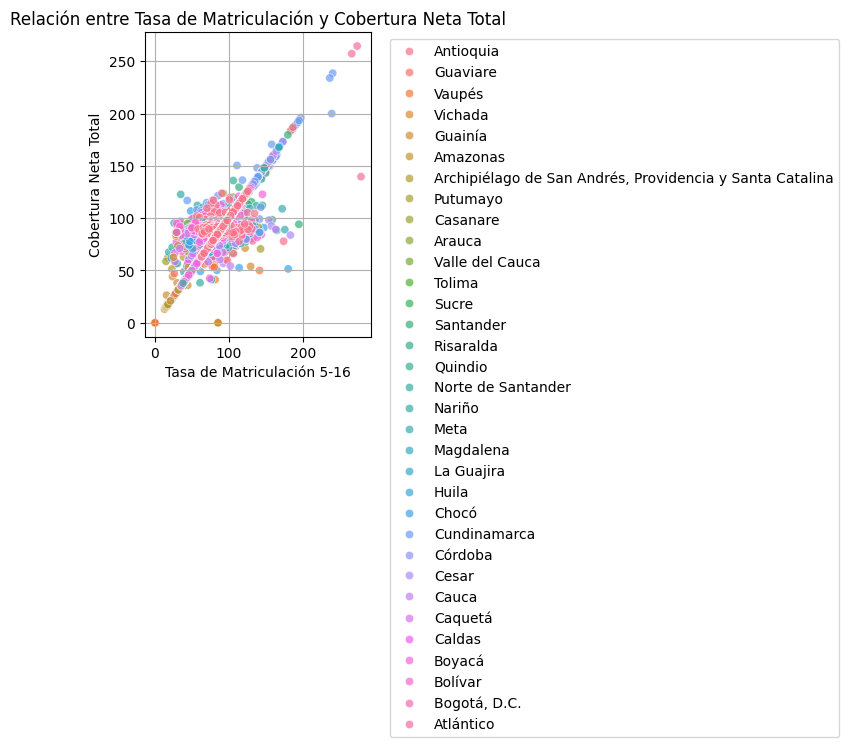

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=educacion_geo,
    x='tasa_matriculacion_5_16',
    y='cobertura_neta_total',
    hue='nombre_departamento',
    alpha=0.7
)
plt.title('Relación entre Tasa de Matriculación y Cobertura Neta Total')
plt.xlabel('Tasa de Matriculación 5-16')
plt.ylabel('Cobertura Neta Total')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### modelo estrella

In [188]:
educacion_geo['anio'] = educacion_geo['anio'].astype(int) ## convertir año a entero

In [189]:
dim_tiempo = educacion_geo[['anio']].drop_duplicates().copy()
dim_tiempo['decada'] = (dim_tiempo['anio'] // 10) * 10
dim_tiempo['quinquenio'] = pd.cut(
    dim_tiempo['anio'],
    bins=[2010, 2015, 2020, 2025],
    labels=['2011-2015', '2016-2020', '2021-2024']
)


In [198]:
dim_tiempo.head(3)

,anio,decada,quinquenio
0,2023,2020,2021-2024
1121,2022,2020,2021-2024
2242,2021,2020,2021-2024


In [190]:
dim_municipio = educacion_geo[[
    'codigo_municipio', 'nombre_municipio',
    'codigo_departamento', 'LATITUD', 'LONGITUD'
]].drop_duplicates().copy()


In [199]:
dim_municipio.head(3)

,codigo_municipio,nombre_municipio,codigo_departamento,LATITUD,LONGITUD
0,05004,Abriaquí,05,6.627569,-76.085978
1,95025,El Retorno,95,2.143447,-72.243649
2,95200,Miraflores,95,1.363975,-72.018110


In [191]:
dim_departamento = educacion_geo[[
    'codigo_departamento', 'nombre_departamento'
]].drop_duplicates().copy()


In [200]:
dim_departamento.head(3)

,codigo_departamento,nombre_departamento
0,05,Antioquia
1,95,Guaviare
3,97,Vaupés


In [192]:
hechos_educacion = educacion_geo.drop(columns=[
    'nombre_municipio', 'nombre_departamento', 'LATITUD', 'LONGITUD'
])


In [197]:
hechos_educacion.head(3)

,anio,codigo_municipio,codigo_departamento,poblacion_5_16,total_matriculados,tasa_matriculacion_5_16,cobertura_neta_total,cobertura_neta_transicion,cobertura_neta_primaria,cobertura_neta_secundaria,cobertura_neta_media,cobertura_bruta_total,cobertura_bruta_transicion,cobertura_bruta_primaria,cobertura_bruta_secundaria,cobertura_bruta_media,tasa_desercion_total,tasa_desercion_primaria,tasa_desercion_secundaria,tasa_aprobacion_total,tasa_aprobacion_transicion,tasa_aprobacion_primaria,tasa_aprobacion_secundaria,tasa_aprobacion_media,tasa_reprobacion_total,tasa_reprobacion_transicion,tasa_reprobacion_primaria,tasa_reprobacion_secundaria,tasa_reprobacion_media,tasa_repitencia_total,tasa_repitencia_transicion,tasa_repitencia_primaria,tasa_repitencia_secundaria,tasa_repitencia_media,poblacion
0,2023,05004,05,503.0,31497.86,62.62,62.62,44.19,63.33,51.53,40.23,66.80,58.14,72.86,66.87,56.32,1.19,1.31,0.00,92.26,0.00,96.73,83.49,93.88,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04,2841.0
1,2023,95025,95,4438.0,236412.26,53.27,53.27,33.91,48.89,44.90,21.30,62.98,54.20,65.19,69.60,48.54,5.56,4.99,6.11,87.67,0.00,87.90,84.50,92.98,6.78,0.00,7.11,9.39,1.75,9.34,6.95,11.84,8.48,3.16,16984.0
2,2023,95200,95,2014.0,65495.28,32.52,32.52,17.58,25.33,26.43,10.75,38.58,36.36,37.28,46.10,26.16,7.85,8.43,6.36,82.68,3.33,84.64,79.51,87.50,9.47,3.33,6.93,14.13,7.81,8.65,6.67,9.04,10.25,1.54,7947.0


In [196]:
dim_tiempo.to_csv("../Datos/dim_tiempo.csv", index=False)
dim_municipio.to_csv("../Datos/dim_municipio.csv", index=False)
dim_departamento.to_csv("../Datos/dim_departamento.csv", index=False)
hechos_educacion.to_csv("../Datos/hechos_educacion.csv", index=False)
